In [145]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [146]:
with open('apache_logs.txt', 'r') as f:
    lines = f.readlines()

lines = [line for line in lines ]
lines[0]

'83.149.9.216 - - [17/May/2015:10:05:03 +0000] "GET /presentations/logstash-monitorama-2013/images/kibana-search.png HTTP/1.1" 200 203023 "http://semicomplete.com/presentations/logstash-monitorama-2013/" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.77 Safari/537.36"\n'

In [147]:
log_pattern = log_pattern = r'(?P<ip>\d+\.\d+\.\d+\.\d+) - - \[(?P<date>[^\]]+)\] "(?P<request>[A-Z]+) [^"]+" (?P<status_code>\d{3}) (?P<size>\d+) "(?P<referrer>[^"]+)" "(?P<user_agent>[^"]+)"'


In [148]:
df = []
for line in lines:
    match = re.match(log_pattern, line)
    if match:
        df.append(match.groupdict())

columns = ['ip', 'date', 'request', 'status_code', 'size', 'referrer', 'user_agent']
df = pd.DataFrame(df, columns=columns)

In [149]:
df.head(5)

,ip,date,request,status_code,size,referrer,user_agent
0,83.149.9.216,17/May/2015:10:05:03 +0000,GET,200,203023,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
1,83.149.9.216,17/May/2015:10:05:43 +0000,GET,200,171717,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
2,83.149.9.216,17/May/2015:10:05:47 +0000,GET,200,26185,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
3,83.149.9.216,17/May/2015:10:05:12 +0000,GET,200,7697,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
4,83.149.9.216,17/May/2015:10:05:07 +0000,GET,200,2892,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...


In [150]:
df.to_csv('parsed_apache_logs.csv', index=False)  

a.  Визначити кількість користувачів за днями

In [151]:
df['date'] = pd.to_datetime(df['date'], format='%d/%b/%Y:%H:%M:%S %z')


In [152]:
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df

,ip,date,request,status_code,size,referrer,user_agent
0,83.149.9.216,2015-05-17,GET,200,203023,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
1,83.149.9.216,2015-05-17,GET,200,171717,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
2,83.149.9.216,2015-05-17,GET,200,26185,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
3,83.149.9.216,2015-05-17,GET,200,7697,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
4,83.149.9.216,2015-05-17,GET,200,2892,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
...,...,...,...,...,...,...,...
9325,100.43.83.137,2015-05-20,GET,200,13358,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
9326,63.140.98.80,2015-05-20,GET,200,14872,http://www.semicomplete.com/blog/tags/puppet?f...,Tiny Tiny RSS/1.11 (http://tt-rss.org/)
9327,63.140.98.80,2015-05-20,GET,200,10756,-,Tiny Tiny RSS/1.11 (http://tt-rss.org/)
9328,66.249.73.135,2015-05-20,GET,200,32352,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...


In [165]:
df_unique_ip = df.groupby('date')['ip'].nunique().reset_index()
df_unique_ip

,date,ip
0,2015-05-17,325
1,2015-05-18,584
2,2015-05-19,526
3,2015-05-20,478


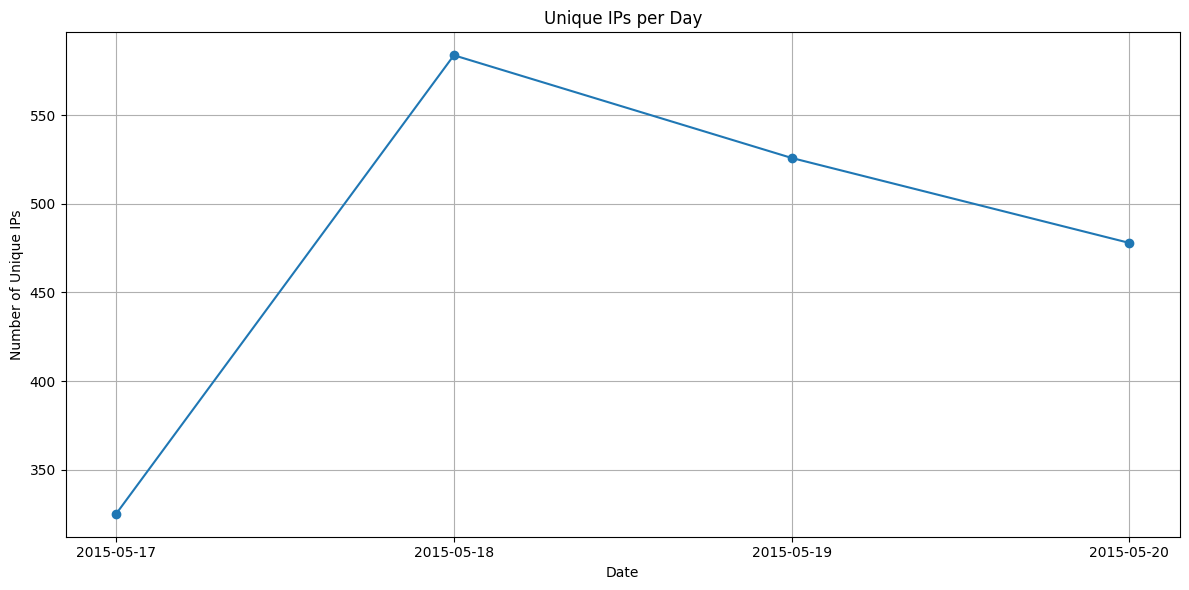

In [166]:

plt.figure(figsize=(12, 6))
plt.plot(df_unique_ip['date'], df_unique_ip['ip'], marker='o', linestyle='-')        
plt.title('Unique IPs per Day')
plt.xlabel('Date')
plt.ylabel('Number of Unique IPs')
plt.grid()
plt.tight_layout()
plt.show()

b. Ранжувати користувачів за User-Agent

In [167]:
df

,ip,date,request,status_code,size,referrer,user_agent
0,83.149.9.216,2015-05-17,GET,200,203023,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
1,83.149.9.216,2015-05-17,GET,200,171717,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
2,83.149.9.216,2015-05-17,GET,200,26185,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
3,83.149.9.216,2015-05-17,GET,200,7697,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
4,83.149.9.216,2015-05-17,GET,200,2892,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
...,...,...,...,...,...,...,...
9325,100.43.83.137,2015-05-20,GET,200,13358,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
9326,63.140.98.80,2015-05-20,GET,200,14872,http://www.semicomplete.com/blog/tags/puppet?f...,Tiny Tiny RSS/1.11 (http://tt-rss.org/)
9327,63.140.98.80,2015-05-20,GET,200,10756,-,Tiny Tiny RSS/1.11 (http://tt-rss.org/)
9328,66.249.73.135,2015-05-20,GET,200,32352,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...


In [168]:
df['ua_short'] = df['user_agent'].apply(lambda x: x.split(' ')[0])


In [169]:
df_user_agent = df.groupby('ua_short')['ip'].nunique().reset_index().sort_values(by='ip', ascending=False)
df_user_agent

,ua_short,ip
31,Mozilla/5.0,1380
30,Mozilla/4.0,86
1,-,47
10,FeedBurner/1.0,28
35,Opera/9.80,24
...,...,...
54,ZDM/4.0;,1
53,YisouSpider,1
60,ia_archiver,1
63,nutch-1.4/Nutch-1.4,1


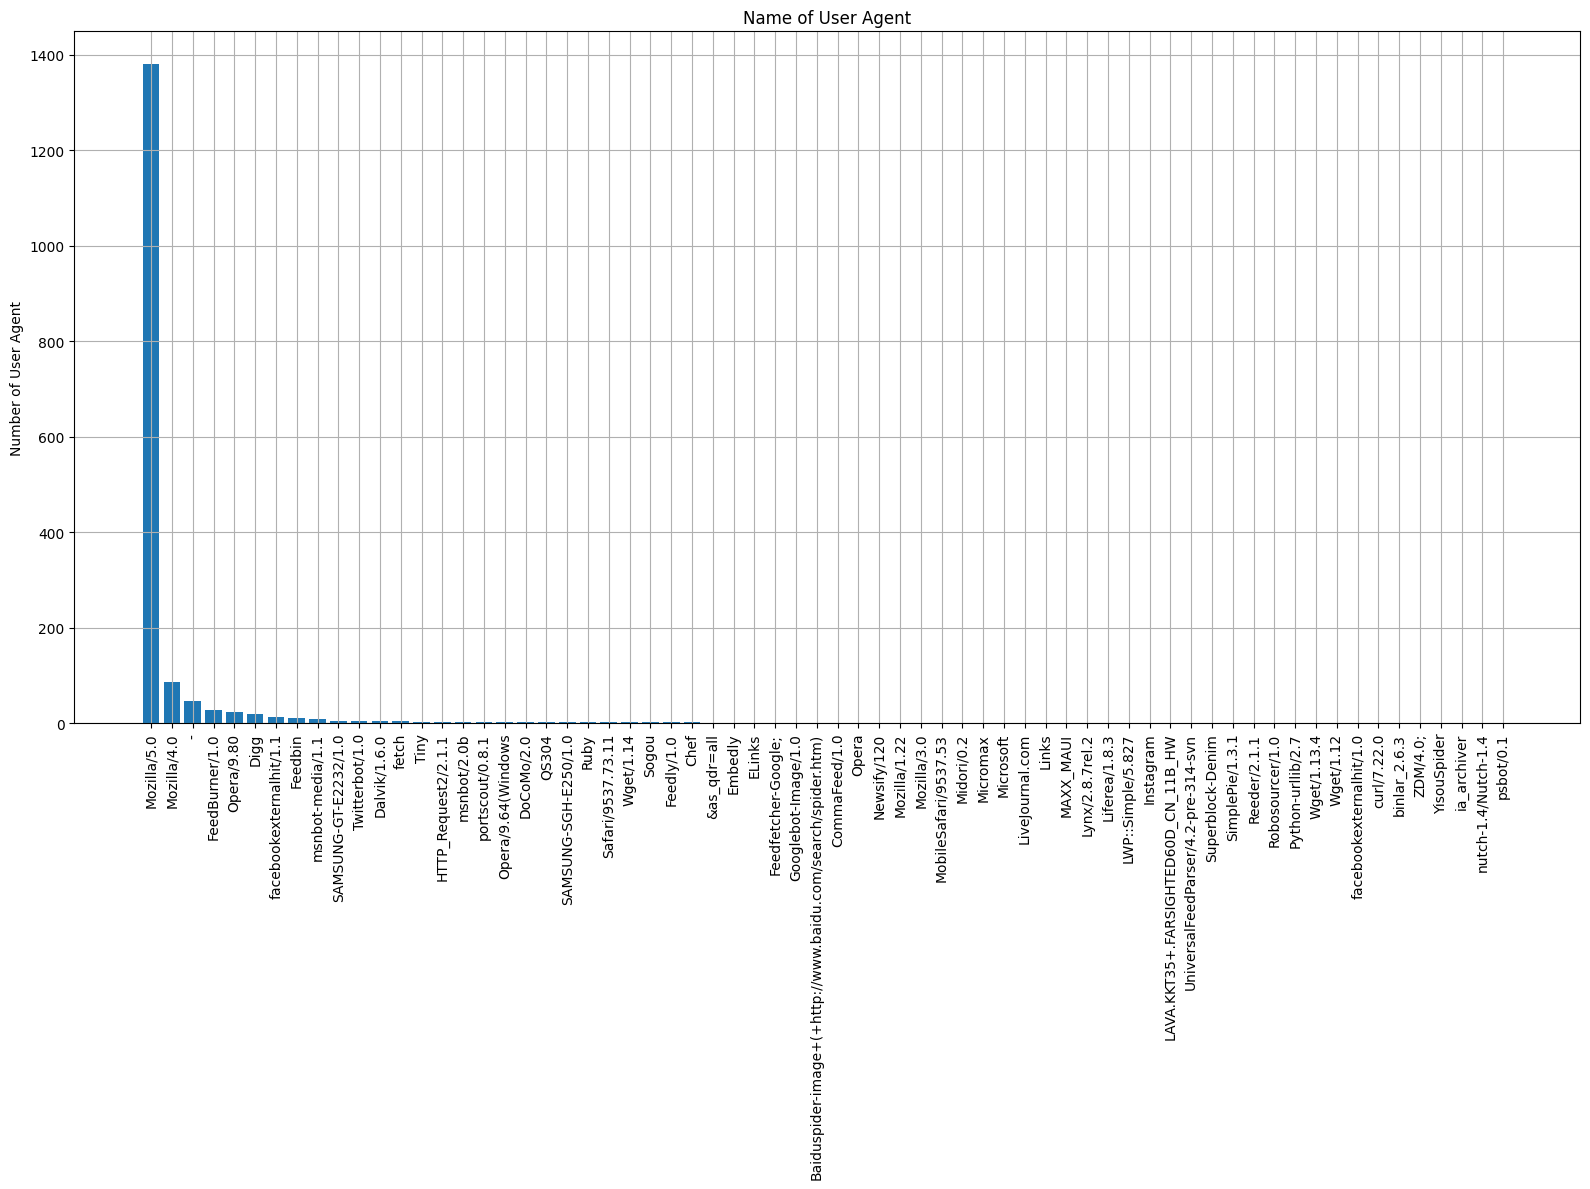

In [170]:
plt.figure(figsize=(16, 12))
plt.bar(df_user_agent['ua_short'], df_user_agent['ip'])
plt.title('Name of User Agent')  
plt.ylabel('Number of User Agent')
plt.xticks(rotation=90) 
plt.grid()
plt.tight_layout()
plt.show()


c. Ранжувати користувачів за операційними системами

In [171]:
def operation_system(ua_list):
    os = []
    for ua in df['user_agent']:
        if 'Windows' in ua:
            os.append('Windows')
        elif 'Linux' in ua:
            os.append('Linux')
        elif 'Macintosh' in ua:
            os.append('Macintosh')
        else:
            os.append('Other')
    return os

ua_list = df['user_agent'].tolist()
os_unique = operation_system(ua_list)
os_df = pd.Series (os_unique).value_counts().reset_index()
os_df



,index,count
0,Windows,3047
1,Other,2760
2,Linux,2189
3,Macintosh,1334


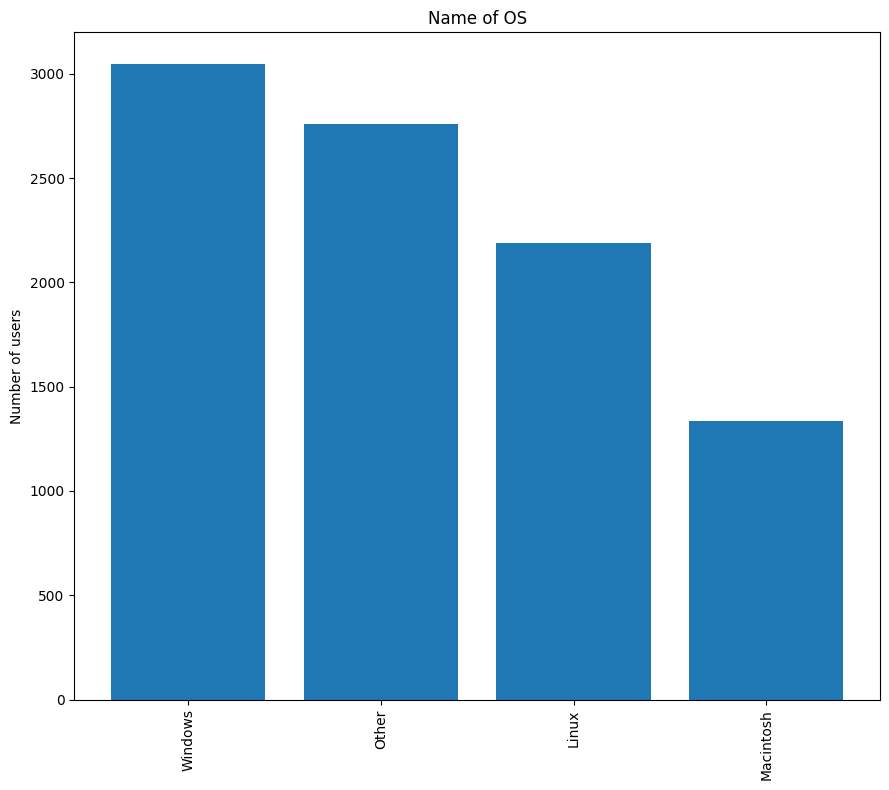

In [196]:
plt.figure(figsize=(9, 8))
plt.bar(os_df['index'], os_df['count'])
plt.title('Name of OS')  
plt.ylabel('Number of users')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


d. Ранжувати користувачів за країною запиту

In [110]:
!pip install geoip2


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [173]:
df

,ip,date,request,status_code,size,referrer,user_agent,ua_short
0,83.149.9.216,2015-05-17,GET,200,203023,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,Mozilla/5.0
1,83.149.9.216,2015-05-17,GET,200,171717,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,Mozilla/5.0
2,83.149.9.216,2015-05-17,GET,200,26185,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,Mozilla/5.0
3,83.149.9.216,2015-05-17,GET,200,7697,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,Mozilla/5.0
4,83.149.9.216,2015-05-17,GET,200,2892,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,Mozilla/5.0
...,...,...,...,...,...,...,...,...
9325,100.43.83.137,2015-05-20,GET,200,13358,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,Mozilla/5.0
9326,63.140.98.80,2015-05-20,GET,200,14872,http://www.semicomplete.com/blog/tags/puppet?f...,Tiny Tiny RSS/1.11 (http://tt-rss.org/),Tiny
9327,63.140.98.80,2015-05-20,GET,200,10756,-,Tiny Tiny RSS/1.11 (http://tt-rss.org/),Tiny
9328,66.249.73.135,2015-05-20,GET,200,32352,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,Mozilla/5.0


In [174]:
import geoip2.database

reader = geoip2.database.Reader('GeoLite2-Country.mmdb')

def user_country(ip):
    try:
        response = reader.country(ip)
        return response.country.name
    except Exception as e:
        print(f"Error for IP {ip}: {e}")
        return 'Unknown'

df['Country'] = df['ip'].apply(lambda x: user_country(x))
country_count = df['Country'].value_counts()
country_count


Country
United States          3578
France                  851
Germany                 545
India                   413
Sweden                  358
                       ... 
Georgia                   1
Oman                      1
Pakistan                  1
Trinidad and Tobago       1
Azerbaijan                1
Name: count, Length: 94, dtype: int64

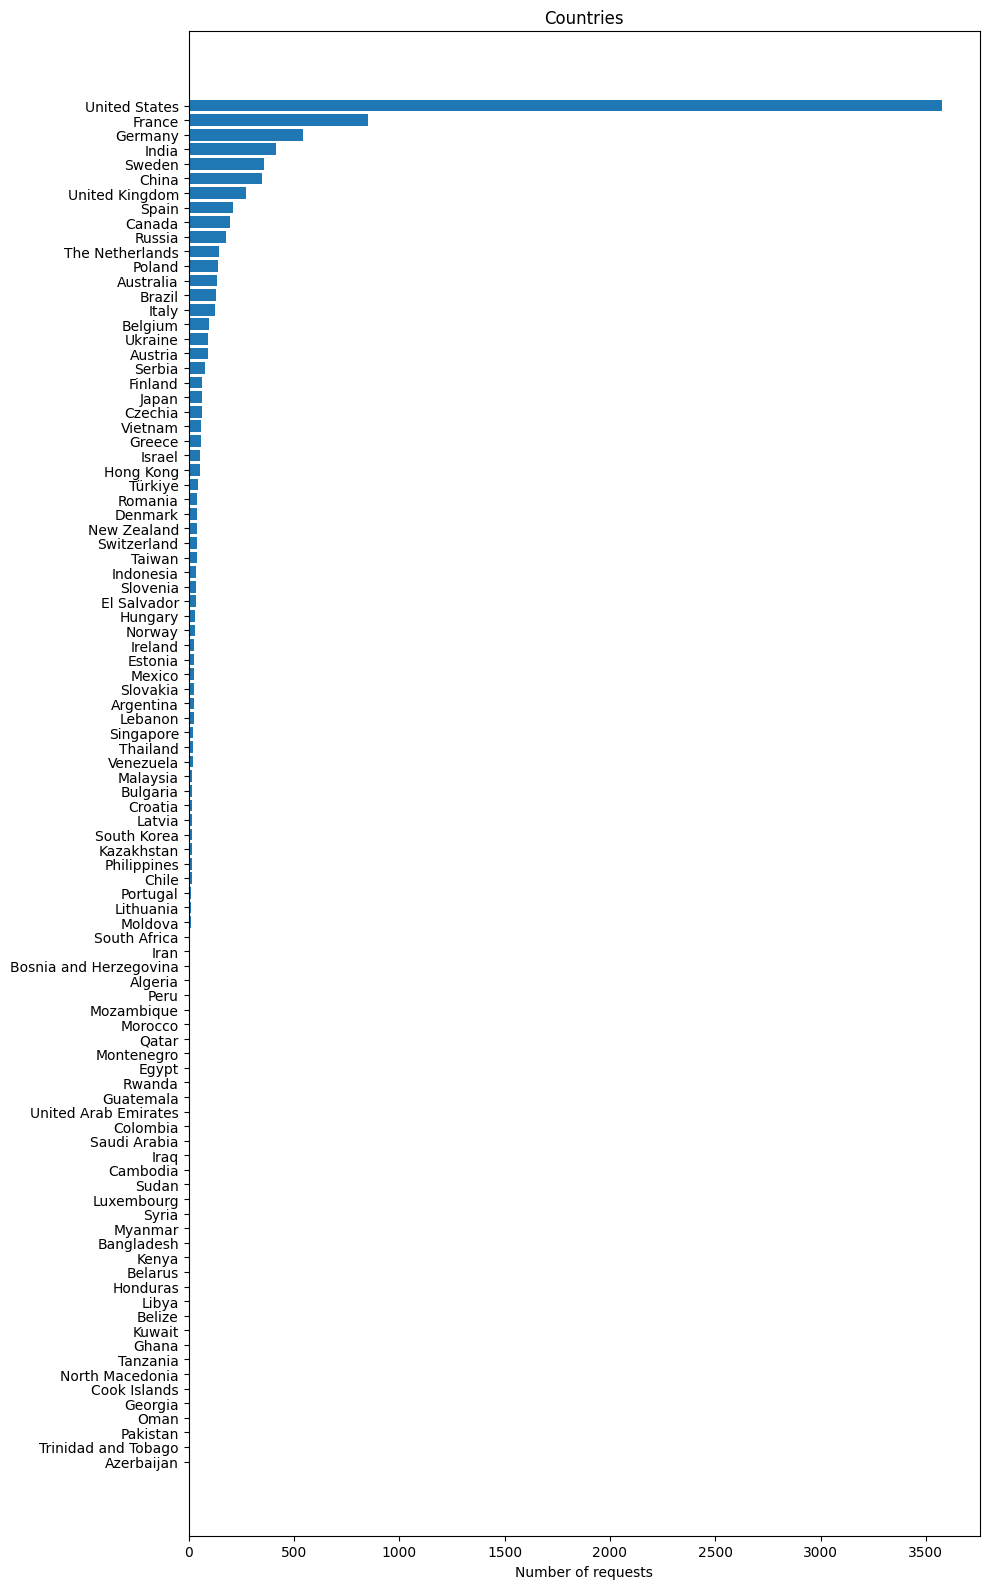

In [197]:
plt.figure(figsize=(10, 16))
plt.barh(country_count.index, country_count.values)
plt.title('Countries')
plt.xlabel('Number of requests')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


Топ країн

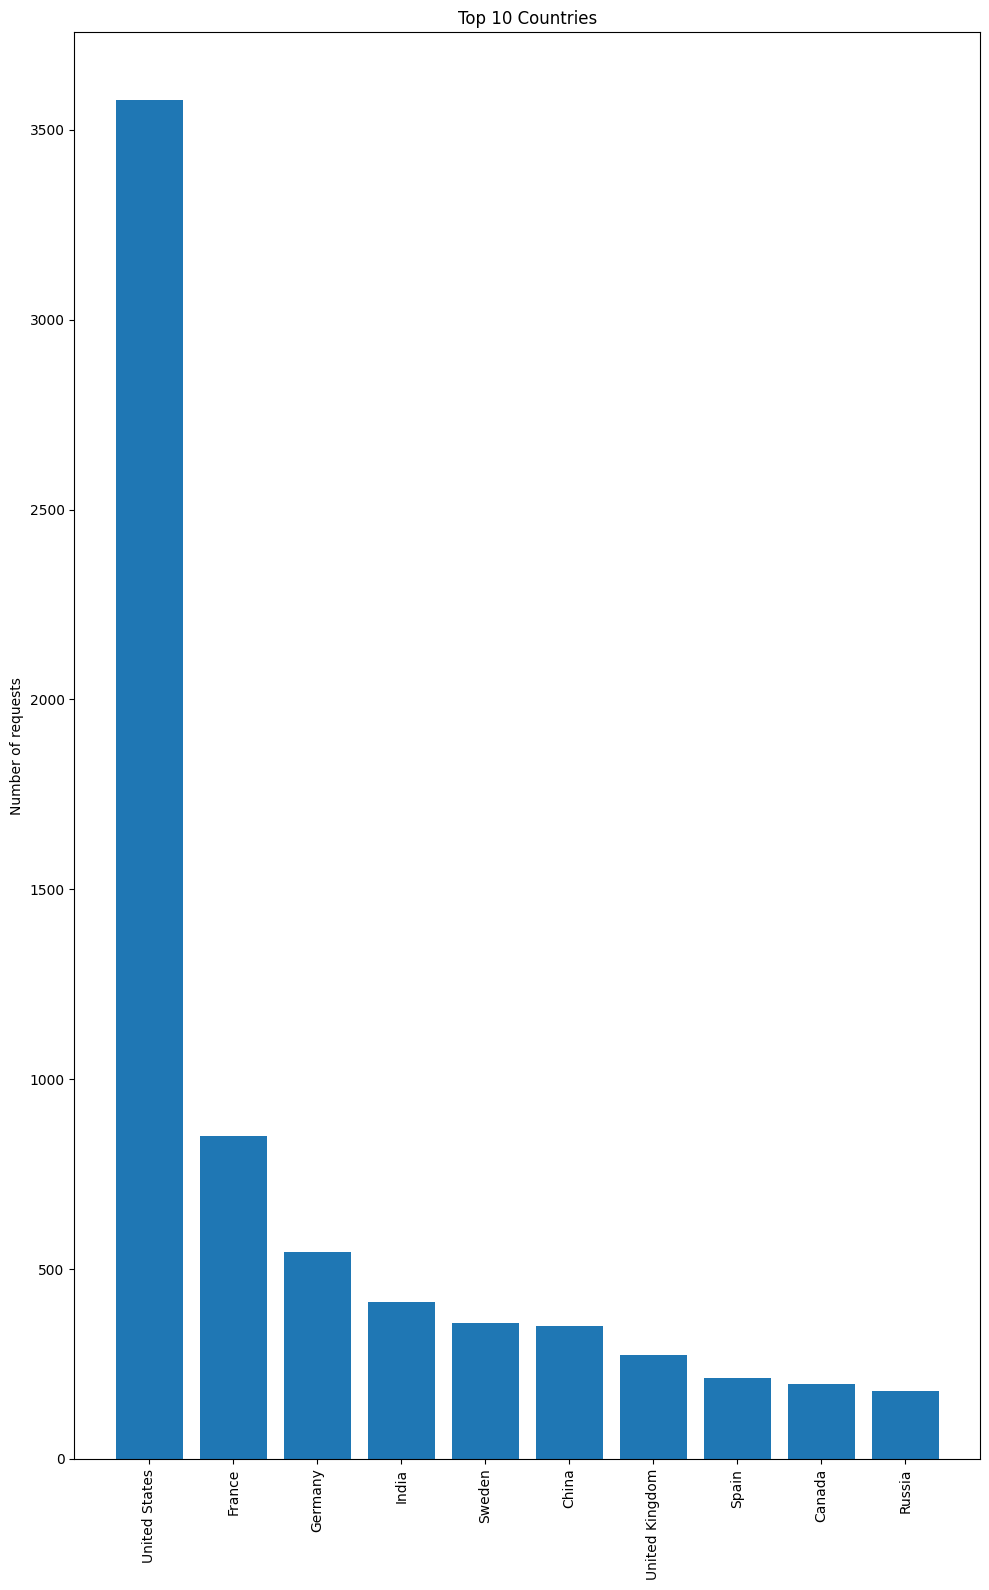

In [176]:
plt.figure(figsize=(10, 16))
plt.bar(country_count.head(10).index, country_count.head(10).values)
plt.title('Top 10 Countries') 
plt.ylabel('Number of requests')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

e. Виокремити пошукових ботів

In [177]:
bot_keywords = ['bot', 'spider', 'crawl', 'Googlebot', 'Bingbot', 'Yandex', 'Slurp', 'DuckDuckBot', 'Baiduspider']

bots = df[df['user_agent'].str.contains('|'.join(bot_keywords), case=False, na=False)]
bot_counts = bots['user_agent'].value_counts().head(10)  




C:\Users\Radom\AppData\Local\Temp\ipykernel_11320\1434714605.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


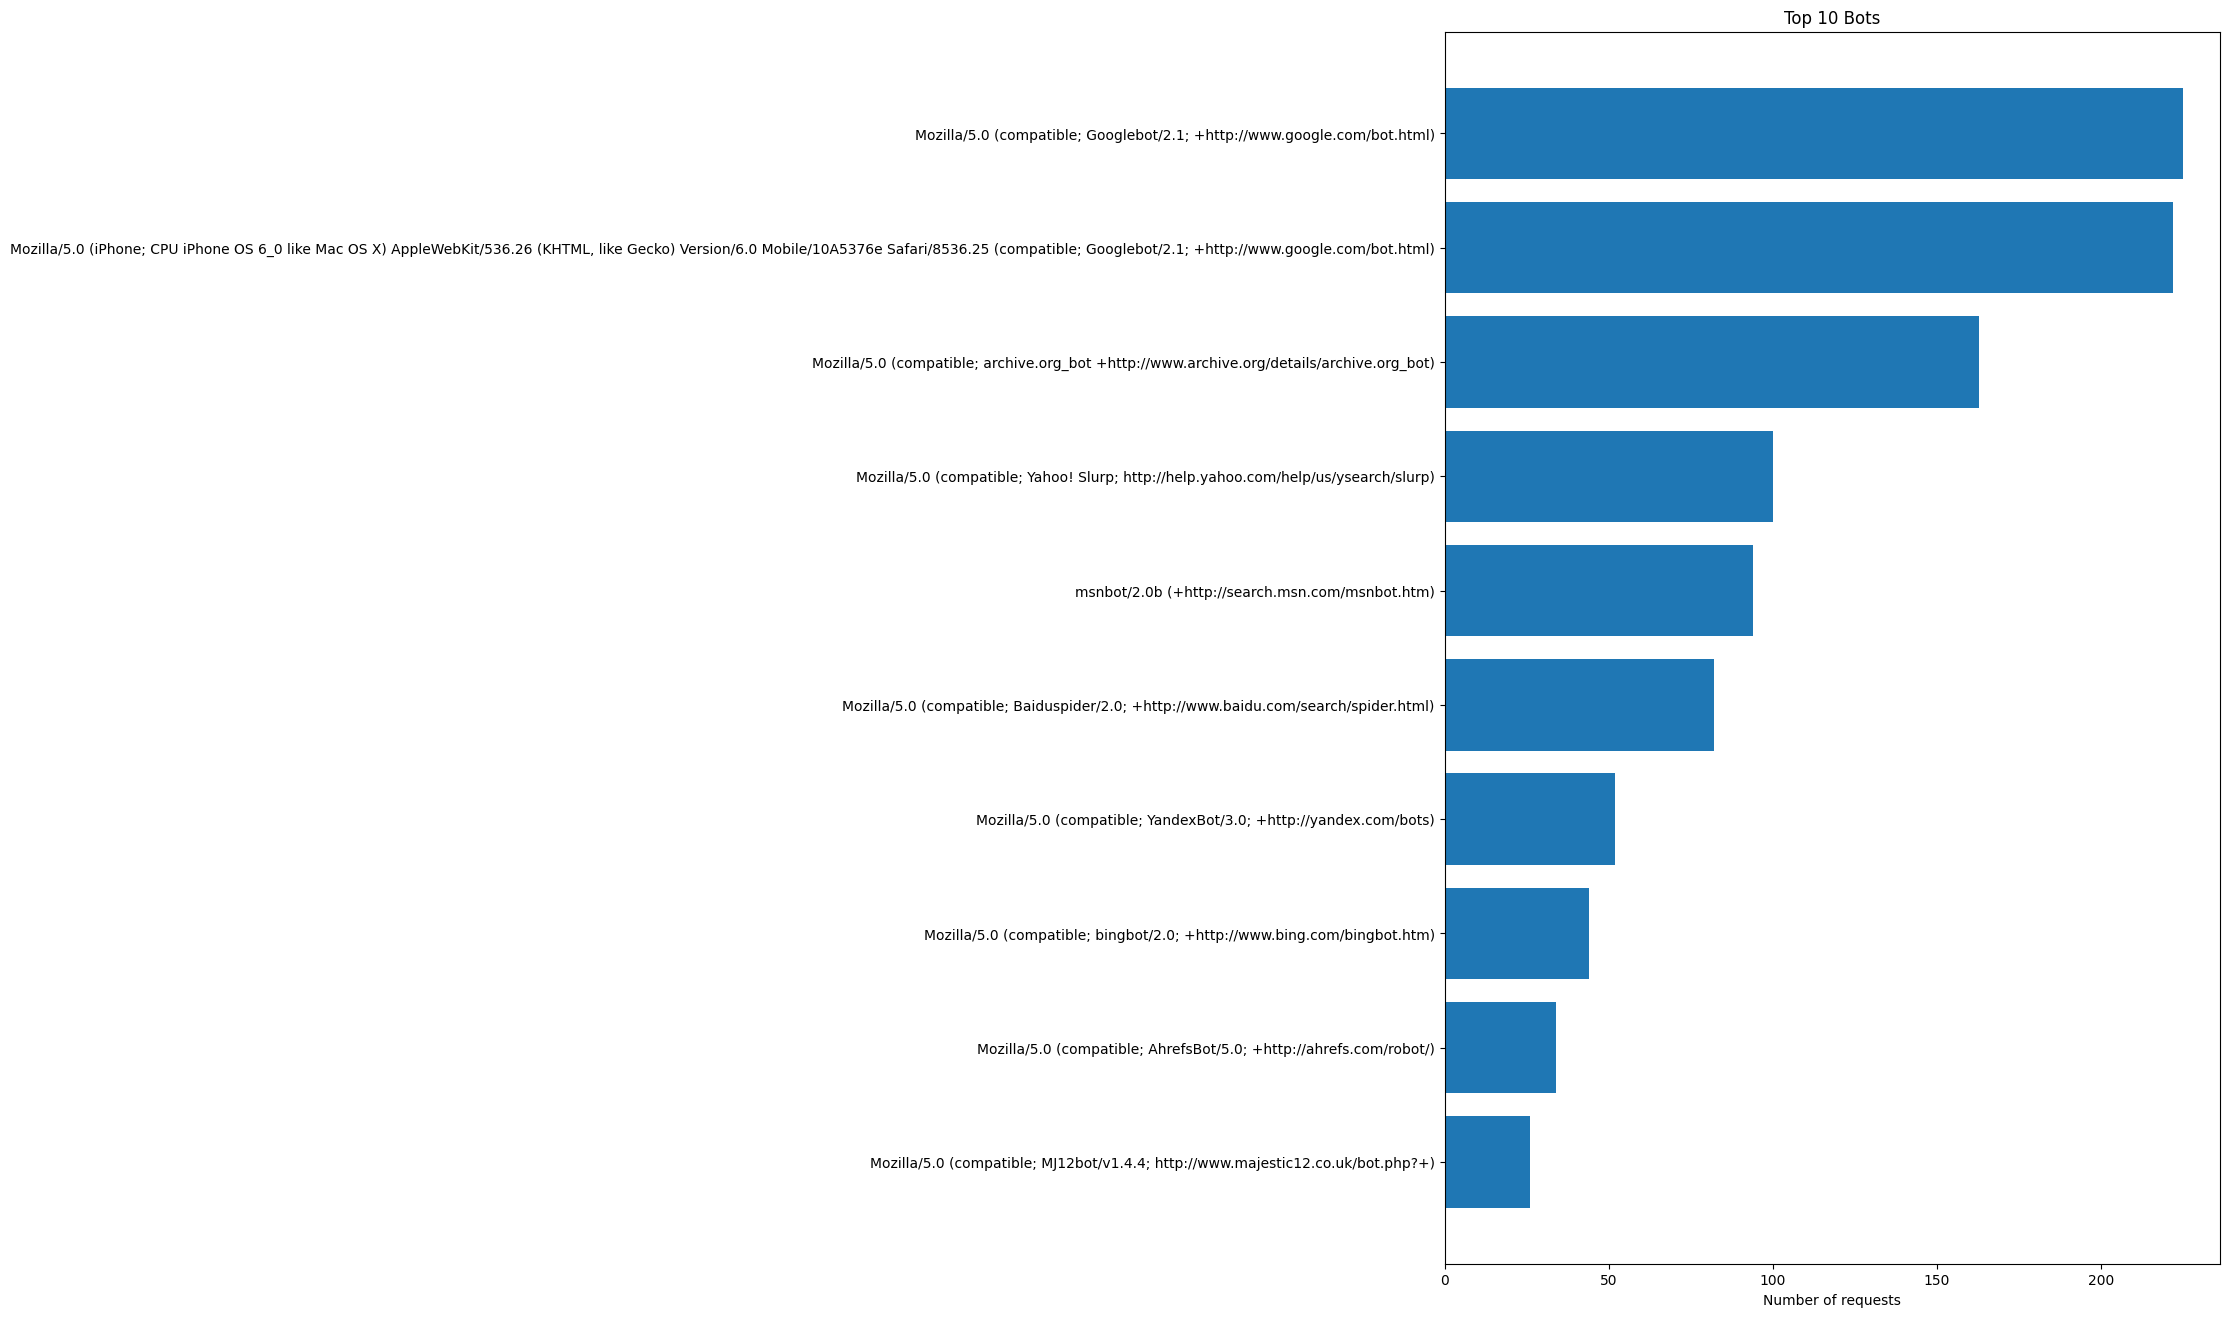

In [178]:
plt.figure(figsize=(10, 16))
plt.barh(bot_counts.index, bot_counts.values)
plt.title('Top 10 Bots')
plt.xlabel('Number of requests')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

f. Детектувати аномалії (якщо такі є)

In [179]:
df.to_csv('parsed_apache_logs_with_country.csv', index=False)


In [182]:
df['status_code'].unique()

array(['200', '404', '301', '206', '403', '416', '500'], dtype=object)

In [185]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [187]:
scaler = StandardScaler()
status_scaled = scaler.fit_transform(df[['status_code']])

In [192]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(status_scaled)


distances = np.linalg.norm(status_scaled - kmeans.cluster_centers_[df['cluster']], axis=1)
df['distance_to_centroid'] = distances


threshold = np.percentile(distances, 95)
df['is_anomaly'] = df['distance_to_centroid'] > threshold


df[df['is_anomaly']].head(10)

,ip,date,request,status_code,size,referrer,user_agent,ua_short,Country,cluster,distance_to_centroid,is_anomaly
62,66.249.73.185,2015-05-17,GET,404,294,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,Mozilla/5.0,United States,1,0.003203,True
173,208.91.156.11,2015-05-17,GET,404,324,-,Chef Client/10.18.2 (ruby-1.9.3-p327; ohai-6.1...,Chef,United States,1,0.003203,True
305,111.199.235.239,2015-05-17,GET,404,364,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...,Mozilla/5.0,China,1,0.003203,True
323,111.199.235.239,2015-05-17,GET,404,364,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...,Mozilla/5.0,China,1,0.003203,True
345,208.91.156.11,2015-05-17,GET,404,324,-,Chef Client/10.18.2 (ruby-1.9.3-p327; ohai-6.1...,Chef,United States,1,0.003203,True
366,144.76.194.187,2015-05-17,GET,404,292,-,-,-,Germany,1,0.003203,True
367,144.76.194.187,2015-05-17,GET,404,303,-,-,-,Germany,1,0.003203,True
413,173.252.73.114,2015-05-17,GET,206,97173,-,facebookexternalhit/1.1 (+http://www.facebook....,facebookexternalhit/1.1,United States,0,0.181629,True
579,89.2.87.1,2015-05-17,GET,206,65536,http://www.google.fr/url?sa=t&rct=j&q=&esrc=s&...,Mozilla/5.0 (Windows NT 5.1; rv:26.0) Gecko/20...,Mozilla/5.0,France,0,0.181629,True
580,89.2.87.1,2015-05-17,GET,206,55278,http://www.google.fr/url?sa=t&rct=j&q=&esrc=s&...,Mozilla/5.0 (Windows NT 5.1; rv:26.0) Gecko/20...,Mozilla/5.0,France,0,0.181629,True


C:\Users\Radom\AppData\Local\Temp\ipykernel_11320\2403525759.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


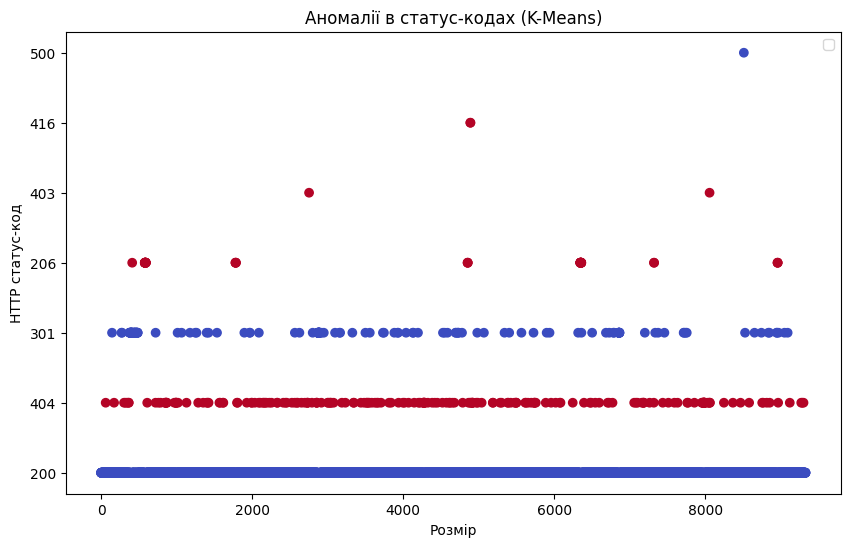

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['status_code'], c=df['is_anomaly'], cmap='coolwarm')
plt.title('Аномалії в статус-кодах (K-Means)')
plt.xlabel('Розмір')
plt.ylabel('HTTP статус-код')
plt.legend()
plt.show()